In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

**RFM :** stands for Recency, Frequency, Monetary — a customer segmentation technique commonly used in marketing analytics and CRM.<br> RFM analysis is a marketing technique that segments customers based on how recently (Recency), how often (Frequency), and how much (Monetary) they purchase. By analyzing these three dimensions, businesses can identify their most valuable customers and tailor marketing strategies accordingly.<br><br>
This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

- **Recency(R) :** How recently did the customer make a purchase?
This metric measures the time elapsed since a customer’s last transaction.
Customers who purchased more recently are considered more engaged and likely to respond to future promotions.

- **Frequency(F) :** How often does the customer make purchases?
This metric counts the total number of transactions made by a customer within a specific period.
Frequent buyers are usually more loyal and valuable to the business.

- **Monetary(M) :** How much money has the customer spent?
This metric sums the total amount spent by a customer over a defined period.
High monetary value customers are often prioritized in retention and upselling campaigns.

**Data Set Features :**
- **InvoiceNo:** Invoice Number. If it starts with 'C', the invoice is cancelled.
- **StockCode:** Product Code.
- **Description:** Product Name.
- **Quantity:** Number of products per invoice.
- **InvoiceDate:** Date and time of the invoice.
- **UnitPrice:** Price per product (in GBP).
- **CustomerID:** Unique customer identifier.
- **Country:** Customer’s country of residence.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("carrie1/ecommerce-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\mcagr\.cache\kagglehub\datasets\carrie1\ecommerce-data\versions\1


In [3]:
import os

dp_0 = os.listdir(path)
print("Dataset files:", dp_0)

Dataset files: ['data.csv']


In [4]:
df = pd.read_csv('C:/Users/mcagr/.cache/kagglehub/datasets/carrie1/ecommerce-data/versions/1/data.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# I cloned the DataFrame as a precaution.
df_ = df.copy()

In [8]:
# Converted 'InvoiceDate' to datetime to make sure it is suitable for further operations.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
# Checked the data type as a precaution. 'InvoiceDate' was originally an object type, so I converted it to datetime.
# This is necessary because I need to calculate the difference between today and the invoice date for further operations.
type(df['InvoiceDate'])

pandas.core.series.Series

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df.isnull().sum() / len(df)* 100
# I do not use the Description data in RFM analyse thats why I will pass that column but 
# RFM is customer based analysis, that's why I have to drop the missing values.

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

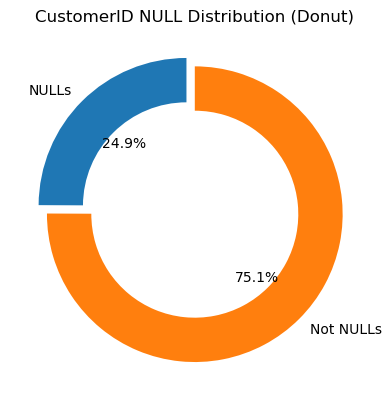

In [12]:
d_customer = df['CustomerID'].isnull().sum()
d_len = len(df) - d_customer

labels = ['NULLs', 'Not NULLs']
sizes = [d_customer, d_len]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.08, 0), wedgeprops=dict(width=0.3))
plt.title("CustomerID NULL Distribution (Donut)")
plt.show()

In [13]:
# Generally, cancelled invoices start with 'C', which means "Cancelled". We need to remove them from our dataset to get better foresight.
df[df['InvoiceNo'].str.startswith("C")].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


- As you can see below, the CustomerID feature does not consist of unique IDs. This is because the dataset records each individual purchase as a separate entry.

In [14]:
# By using the '~' sign, it is possible to filter out cancelled invoices and obtain a dataset that only includes non-cancelled records.
df = df[~df['InvoiceNo'].str.startswith("C")]

In [15]:
# Let's check if we did it right!
df[df['InvoiceNo'].str.startswith("C")].head()

# There is nothing left :)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


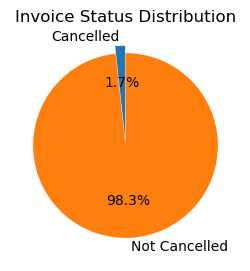

In [16]:
cancelled_count = df_['InvoiceNo'].str.startswith("C").sum()
not_cancelled_count = (~df_['InvoiceNo'].str.startswith("C")).sum()

labels = ['Cancelled', 'Not Cancelled']
sizes = [cancelled_count, not_cancelled_count]


plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.08, 0))
plt.title("Invoice Status Distribution")
plt.show()

In [17]:
# Countries in dataset...
print(df['Country'].unique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Bahrain' 'Israel' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [18]:
# Countries count in dataset...
df['Country'].nunique()

38

In [19]:
# There is an 'Unspecified' value in the Country field.
# This does not affect our RFM analysis, as RFM is performed independently of country information.

df[['Country','CustomerID']].groupby('Country').agg({'CustomerID': 'count', 'Country': 'max'}).max()

CustomerID         354345
Country       Unspecified
dtype: object

In [20]:
# Checked which country (excluding 'Unspecified') accounts for the highest number of transactions or customers.

df[df['Country'] != 'Unspecified'].groupby('Country').agg({'CustomerID': 'count', 'Country': 'max'}).max()

CustomerID            354345
Country       United Kingdom
dtype: object

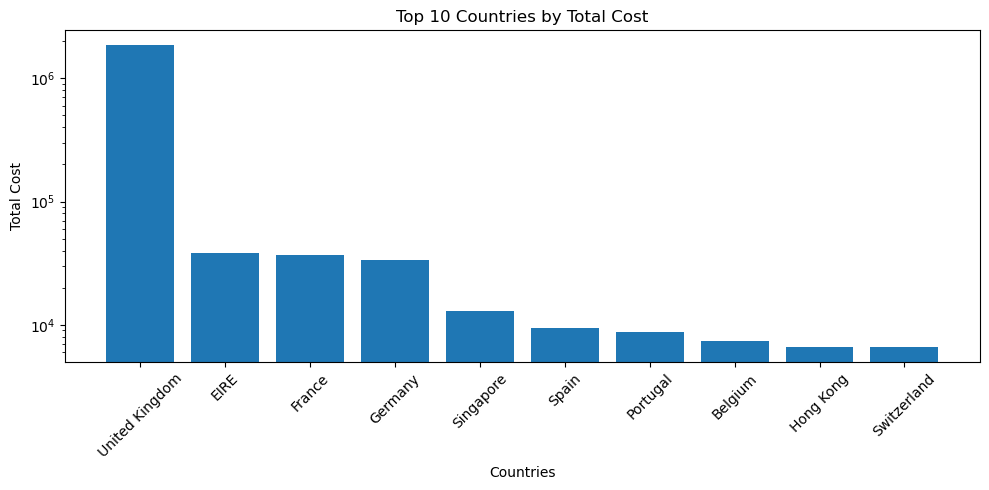

In [21]:
data = df[['UnitPrice', 'Country']].groupby('Country').agg({'UnitPrice':'sum'}).sort_values('UnitPrice', ascending=False)

sum_cost = data['UnitPrice'].head(10)
countries_10 = data.head(10)

plt.figure(figsize=(10, 5))
plt.bar(countries_10.index, sum_cost)
plt.xlabel('Countries')
plt.ylabel('Total Cost')
plt.yscale('log') # For better visualization, I used a logarithmic scale on the y-axis.
plt.title('Top 10 Countries by Total Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Seems England is the best purchaser country around other countries.

In [22]:
import datetime as dt
# Learned the max date of the Invoices..

df["InvoiceDate"].max() 	

Timestamp('2011-12-09 12:50:00')

In [23]:
# Verifying the data type of 'InvoiceDate' to avoid potential issues.

type(df["InvoiceDate"].max())

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
# I set the 'today' variable to two days after the latest invoice date.

today=dt.datetime(2011, 9, 14) 
type(today)

datetime.datetime

In [25]:
# I created the 'TotalPrice' variable to calculate the total amount for each invoice.

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [26]:
# I created the RFM dataframe using groupby and aggregate functions (including lambda expressions) 
# to calculate Recency, Frequency, and Monetary values for each customer.

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today-date.max()).days,
                                    'InvoiceNo': lambda num: len(num),
                                    'UnitPrice': lambda TotalPrice: TotalPrice.sum()})

In [27]:
# I identified the column names 

rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [28]:
# I excluded records with zero values for Monetary and Frequency. 
# Although these records do not impact the analysis, keeping them would unnecessarily increase the dataset size and computational cost.

rfm = rfm[(rfm['Monetary']) > 0 & (rfm['Frequency'] > 0)]

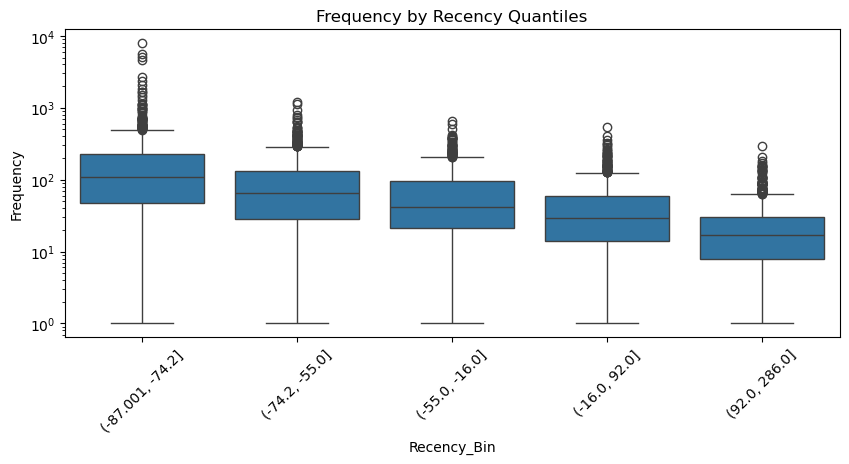

In [31]:
rfm['Recency_Bin'] = pd.qcut(rfm['Recency'], q=5)
plt.figure(figsize=(10, 4))
sns.boxplot(x='Recency_Bin', y='Frequency', data=rfm)
plt.xticks(rotation=45)
plt.yscale('log') # For better visualization, I used a logarithmic scale on the y-axis.
plt.title('Frequency by Recency Quantiles')
plt.show()


In [32]:
rfm.head()

,Recency,Frequency,Monetary,Recency_Bin
CustomerID,,,,
12346.0,238,1,1.04,"(92.0, 286.0]"
12347.0,-85,182,481.21,"(-87.001, -74.2]"
12348.0,-12,31,178.71,"(-16.0, 92.0]"
12349.0,-69,73,605.10,"(-74.2, -55.0]"
12350.0,223,17,65.30,"(92.0, 286.0]"


In [33]:
# Created Recency_Score : 
rfm['Recency_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

In [34]:
# Created Frequency_Score :
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])

In [35]:
# Created Monetary_Score :
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

**NOTE :**  **pd.qcut()** A function that divides data into equal-sized quantile groups.<br>
I set it to 5 groups because, in RFM analysis, it is common to divide the data into 5 equal segments, assigning scores from 1 to 5.

In [36]:
# I created the 'RFM_SCORE' column, which forms the backbone of the RFM analysis.

rfm['RFM_SCORE'] = (rfm['Recency_Score'].astype(str)+rfm['Frequency_Score'].astype(str)+rfm['Monetary_Score'].astype(str))

In [37]:
# Let's take a look to the heighest scores :
rfm[['Monetary_Score', 'RFM_SCORE']][rfm['RFM_SCORE'] == '555'].head()

,Monetary_Score,RFM_SCORE
CustomerID,,
12347.0,5,555
12362.0,5,555
12417.0,5,555
12423.0,5,555
12433.0,5,555


In [38]:
# Let's take a look to the lowest scores :

rfm[['Monetary_Score', 'RFM_SCORE']][rfm['RFM_SCORE'] == '111'].head()

,Monetary_Score,RFM_SCORE
CustomerID,,
12346.0,1,111
12353.0,1,111
12361.0,1,111
12386.0,1,111
12402.0,1,111


In [39]:
# I segmented the customers into different classes based on their RFM scores:
segment_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'}

rfm['Segment'] = rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str)

rfm['Segment'] = rfm['Segment'].replace(segment_map, regex=True)


In [40]:
# I imported squarify library to create the segment treemap :

import squarify

In [41]:
# In order to create a tree map (treemap), it is necessary to know the customer count in each segment. 
# This is because the size of each area in a treemap is proportional to the number of customers in that segment.

# Calculates the customer count for each segment.
segment_counts = rfm['Segment'].value_counts()

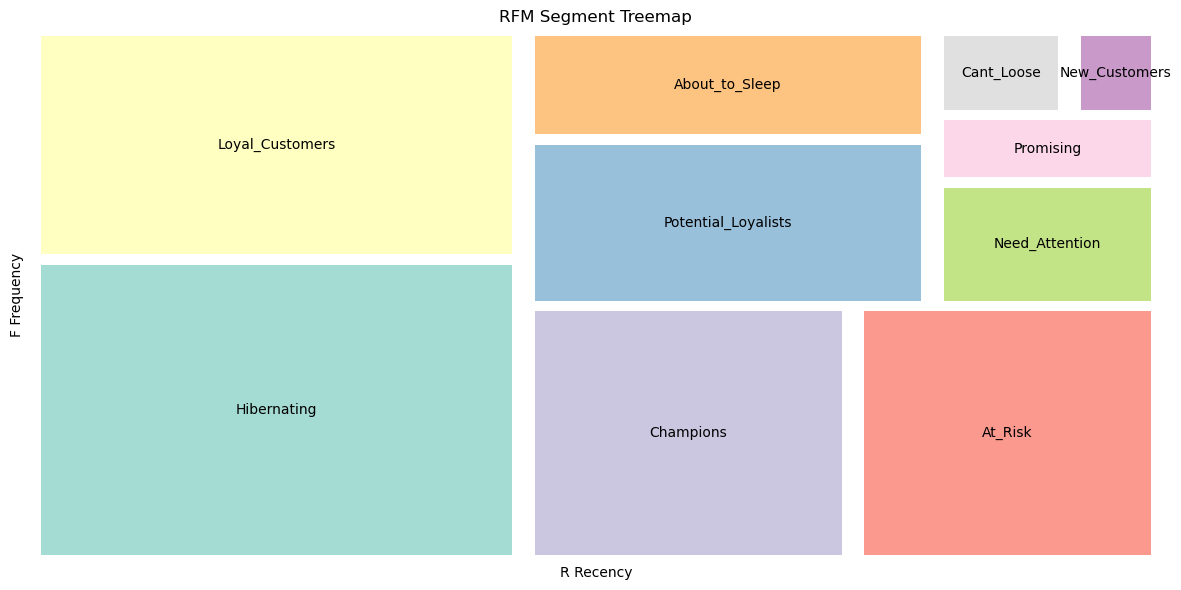

In [42]:
plt.figure(figsize=(12, 6))

squarify.plot(
    sizes=segment_counts.values,
    label= segment_counts.index,
    color=sns.color_palette('Set3', n_colors=len(segment_counts)),
    alpha=0.8, pad = 3
)
plt.title('RFM Segment Treemap')
plt.xlabel('R Recency')
plt.ylabel('F Frequency')

# This part removes the lines and marks on axises but keeps the x and y labels:

plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


In [43]:
# I created a new empty DataFrame to store customer IDs in the "Need_Attention" segment
new_df = pd.DataFrame()

# I filtered the RFM DataFrame to get customers in the "Need_Attention" segment,
# extracted their index (which represents customer IDs),
# and stored it in a new column named "Need_Attention"

new_df["Need_Attention"] = rfm[rfm["Segment"] == "Need_Attention"].index

# Finally, I exported this list of "Need_Attention" customer IDs to a CSV file
new_df.to_csv("RFM_RetailCustomer_Need_Attention.csv")

In [44]:
# We can also export the full list to Excel and divide it by segment later.

rfm['Segment'].to_csv('RFM_RetailCustomer_All.csv')